# 작업형 제 2 유형 예시문제

In [1]:
#그래프 한글띄우기
import pandas as pd
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': 
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': 
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False 

In [2]:
import os

# os.chdir -> 데이터가 저장된 경로
os.chdir('../../../../data/03_dataq/dataq')

In [84]:
y_train = pd.read_csv('y_train.csv')
X_train = pd.read_csv('X_train.csv',encoding='euc-kr')
test  = pd.read_csv('X_test.csv',encoding='euc-kr')

## 데이터 전처리 및 EDA

```{admonition} Question 1
**y_train,X_train데이터를 합쳐 trainDf 변수에 저장하라**
```

In [4]:
trainDf = pd.merge(y_train,X_train)

In [5]:
trainDf.head(3)

,cust_id,gender,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,1,0,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,2,1,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1


```{admonition} Question 2
**trainDf와 X_test의 결측치가 있는 컬럼의 숫자 및 결측치 숫자를 파악하고 결측치처리 방식에 대해 생각해보자**
```

In [6]:
trainNAN = trainDf.isnull().sum()

In [7]:
trainNAN

cust_id       0
gender        0
총구매액          0
최대구매액         0
환불금액       2295
주구매상품         0
주구매지점         0
내점일수          0
내점당구매건수       0
주말방문비율        0
구매주기          0
dtype: int64

In [8]:
testNAN = X_test.isnull().sum()

In [9]:
testNAN

cust_id       0
총구매액          0
최대구매액         0
환불금액       1611
주구매상품         0
주구매지점         0
내점일수          0
내점당구매건수       0
주말방문비율        0
구매주기          0
dtype: int64

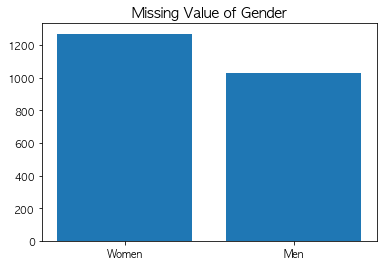

In [10]:
isnullGender = trainDf[trainDf['환불금액'].isnull()].gender.value_counts()

plt.bar(isnullGender.index,isnullGender.values)
plt.xticks([0,1],['Women','Men'])
plt.title("Missing Value of Gender",fontsize=14)
plt.show()

In [11]:
trainDf['환불금액'].describe()

count    1.205000e+03
mean     2.407822e+07
std      4.746453e+07
min      5.600000e+03
25%      2.259000e+06
50%      7.392000e+06
75%      2.412000e+07
max      5.637530e+08
Name: 환불금액, dtype: float64

환블금액의 경우 최솟값이 0이 아니기에, Nan은 결측치가 아닌 환불을 하지않은 경우(0원)로 판단 할수 있다. nan은 0으로 채운다

In [85]:
trainDf['환불금액'] =trainDf['환불금액'].fillna(0)
test['환불금액'] = test['환불금액'].fillna(0)

In [13]:
trainDf.head(3)

,cust_id,gender,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,1,0,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,2,1,3197000,1639000,0.0,남성 캐주얼,관악점,2,2.000000,0.000000,1


```{admonition} Question 3
**범주형 변수의 유일값과 유일값의 갯수를 파악하라**
```

In [14]:
main_index = trainDf['주구매상품'].value_counts().index

In [15]:
print('주구매상품 유일값 수 ',len(main_index))
print('주구매상품 유일값 리스트 ',list(main_index))

주구매상품 유일값 수  42
주구매상품 유일값 리스트  ['기타', '가공식품', '농산물', '화장품', '시티웨어', '디자이너', '수산품', '캐주얼', '명품', '섬유잡화', '골프', '스포츠', '일용잡화', '육류', '모피/피혁', '남성 캐주얼', '구두', '건강식품', '차/커피', '아동', '피혁잡화', '축산가공', '주방용품', '셔츠', '젓갈/반찬', '주방가전', '트래디셔널', '남성정장', '생활잡화', '주류', '가구', '커리어', '란제리/내의', '대형가전', '식기', '액세서리', '침구/수예', '보석', '통신/컴퓨터', '남성 트랜디', '소형가전', '악기']


In [16]:
main_center = trainDf['주구매지점'].value_counts().index

In [17]:
print('주구매지점 유일값 수 ',len(main_center))
print('주구매지점 유일값 리스트 ',list(main_center))

주구매지점 유일값 수  24
주구매지점 유일값 리스트  ['본  점', '잠실점', '분당점', '부산본점', '영등포점', '일산점', '강남점', '광주점', '노원점', '청량리점', '대전점', '미아점', '부평점', '동래점', '관악점', '인천점', '안양점', '포항점', '대구점', '울산점', '센텀시티점', '전주점', '창원점', '상인점']


In [18]:
trainDf.head(3)

,cust_id,gender,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,1,0,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,2,1,3197000,1639000,0.0,남성 캐주얼,관악점,2,2.000000,0.000000,1


```{admonition} Question 4
**연속형 변수들의 성별에 따른 분포차이를 시각화해라**
```

In [19]:
t= trainDf.copy()

In [20]:
import numpy as np

In [21]:
numeric = t.select_dtypes(include=np.number).columns[2:]

총구매액


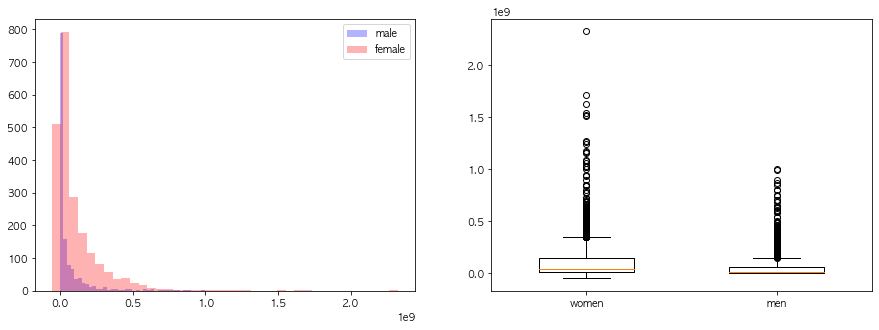

최대구매액


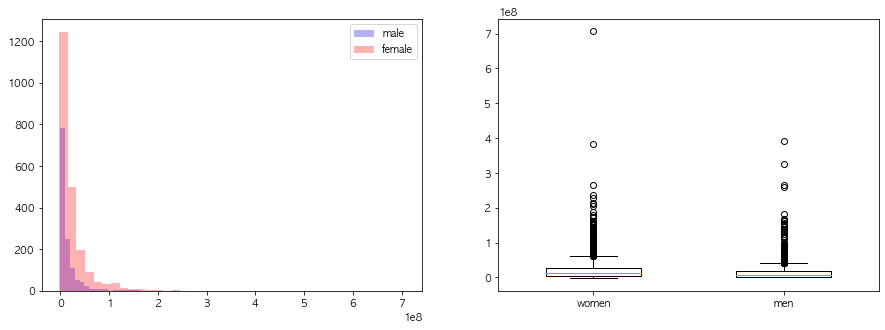

환불금액


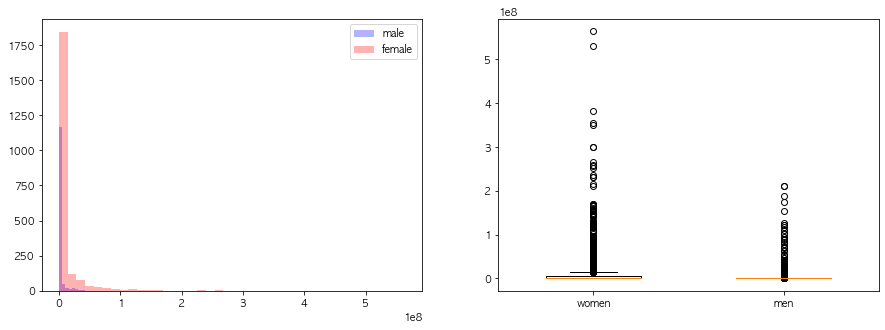

내점일수


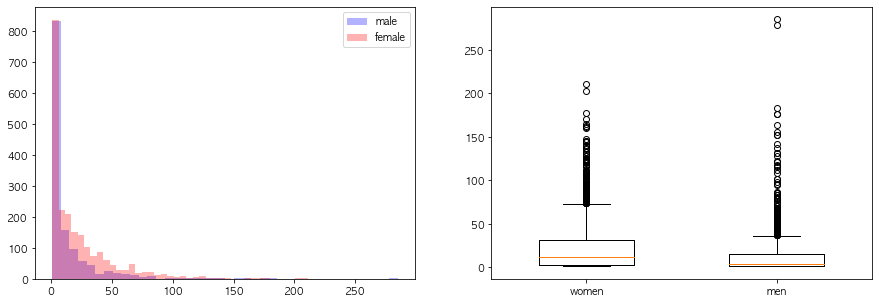

내점당구매건수


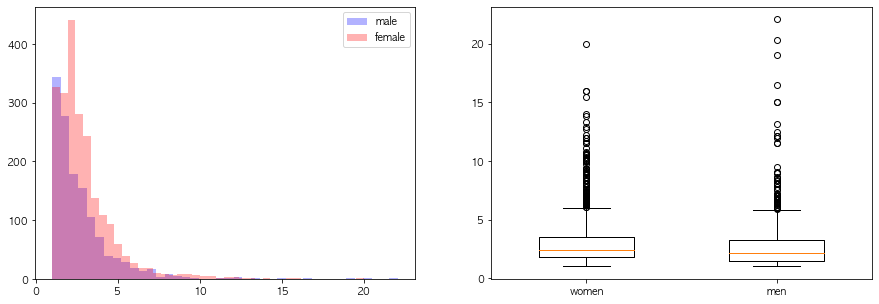

주말방문비율


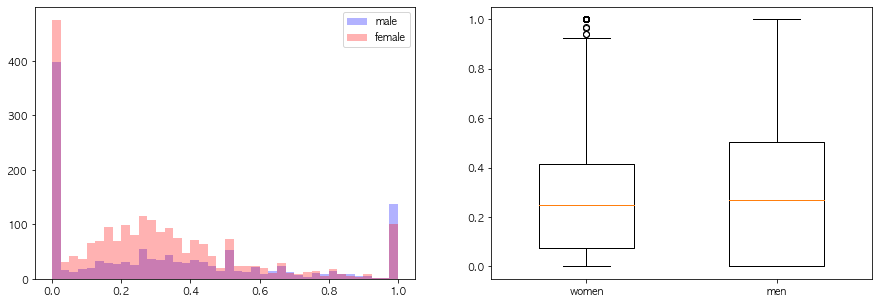

구매주기


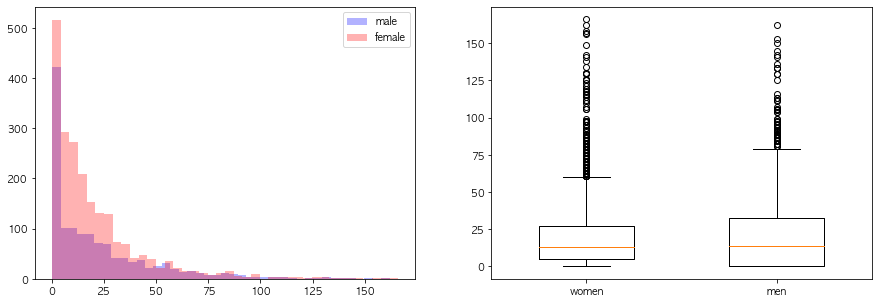

In [22]:
for v in numeric:
    df = t[[v,'gender']]
    
    male = df[df.gender==1]
    female = df[df.gender==0]
    fig, axes = plt.subplots(1,2,figsize=(15,5))
    
    print(v)
    axes[0].hist(male[v],alpha=0.3,color='blue',label='male',bins=40)
    axes[0].hist(female[v],alpha=0.3,color='red',label='female',bins=40)
    axes[0].legend()
    axes[1].boxplot(female[v],positions=[0],widths=0.5)
    axes[1].boxplot(male[v],positions=[1],widths=0.5)
    axes[1].set_xticklabels(['women','men'])
    plt.show()

```{admonition} Question 5
**주 구매지점에 따른 데이터를을 재구성하고 분석하라**
```

In [23]:
t.groupby('주구매지점').agg(['mean','count'])['총구매액'].sort_values('count',ascending=False).head(3)

,mean,count
주구매지점,,
본 점,1.023784e+08,1077
잠실점,8.377841e+07,474
분당점,7.318428e+07,436


In [24]:
pv_t = t.groupby(['주구매지점','주구매상품']).count()['cust_id'].reset_index().rename(columns={'cust_id':'counts'})

In [25]:
pv_t.head(3)

,주구매지점,주구매상품,counts
0,강남점,가공식품,22
1,강남점,건강식품,2
2,강남점,구두,1


In [32]:
pv_data =pv_t.pivot(index='주구매지점',columns='주구매상품',values='counts').fillna(0)
# pv_data = pv_data/pv_data.sum(axis=1)

for v in pv_data.columns:
    pv_data[v] = pv_data[v]/pv_data.sum(axis=1) *100

pv_data.head(3)

주구매상품,가공식품,가구,건강식품,골프,구두,기타,남성 캐주얼,남성 트랜디,남성정장,농산물,...,주방용품,차/커피,축산가공,침구/수예,캐주얼,커리어,통신/컴퓨터,트래디셔널,피혁잡화,화장품
주구매지점,,,,,,,,,,,,,,,,,,,,,
강남점,15.172414,0.0,1.447467,0.000000,0.726639,22.570648,0.775692,0.0,0.0,13.209746,...,0.000000,0.865519,1.733055,0.0,1.737074,0.0,0.0,0.870525,0.871507,7.852356
관악점,6.521739,0.0,0.000000,0.000000,4.038630,23.273689,4.774481,0.0,0.0,15.477830,...,1.350510,0.000000,0.000000,0.0,2.688295,0.0,0.0,0.000000,0.000000,3.995478
광주점,4.385965,0.0,0.881943,2.648588,1.771220,27.509653,0.000000,0.0,0.0,10.073503,...,0.949979,0.000000,1.900861,0.0,5.707962,0.0,0.0,0.000000,0.000000,4.769887


상인점의 경우 1가지 구매 케이스밖에 없기 때문에 제외

In [33]:
pv_data= pv_data.loc[pv_data.index !='상인점']

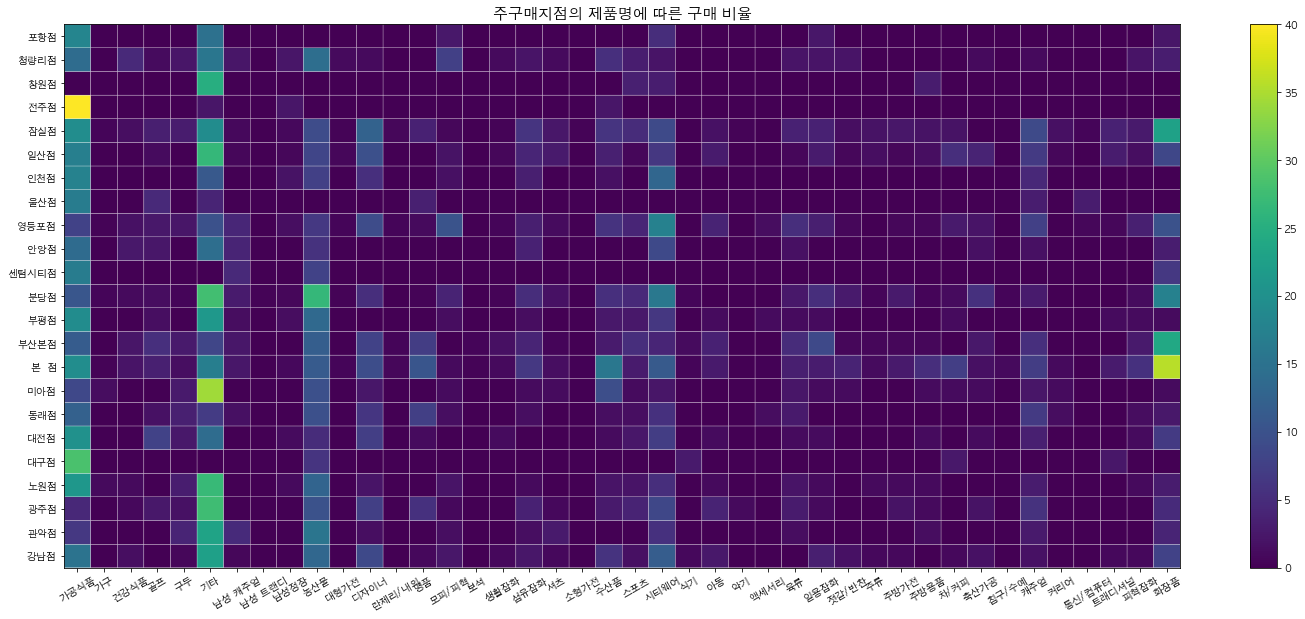

In [34]:
plt.figure(figsize=(25,10))
plt.title('지점별 품목 카테고리 구매 건수',fontsize=1)
plt.pcolor(pv_data,edgecolor='white')
plt.colorbar()
plt.xticks(np.arange(pv_data.shape[1])+0.5,pv_data.columns,rotation=30)
plt.yticks(np.arange(pv_data.shape[0])+0.5,pv_data.index)
plt.title('주구매지점의 제품명에 따른 구매 비율',fontsize=15)
plt.show()

In [35]:
center_gender = t.groupby(['주구매지점','gender']).count()['cust_id'].reset_index().pivot(index='주구매지점',columns='gender',values='cust_id').fillna(0)

In [36]:
center_gender['total']  =center_gender[0] +center_gender[1]

In [37]:
center_gender['ratio']  =center_gender[1] /center_gender['total'] *100

In [40]:
t.groupby('주구매지점').mean()['총구매액'].to_frame().sort_values('총구매액').head(3)

,총구매액
주구매지점,
센텀시티점,1.098891e+07
전주점,3.200927e+07
안양점,6.055826e+07


```{admonition} Question 5
**데이터 정규화 및 one-hot-encoding ,홀드아웃기법, smote방식의 오버샘플링과 랜덤포레스트 모델 학습 및 테스트셋 auc값추출**
```

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x = trainDf.drop(['cust_id','gender','방문당평균구매금액'],axis=1)
y = trainDf.gender

In [64]:
#label 인코딩
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# x_label = x.copy()
# for v in ['주구매상품','주구매지점']:
#     x_label[v] = le.fit_transform(x_label[v])

In [97]:
x_dum = pd.get_dummies(x)
feature_name_lst= x_dum.columns

In [98]:
test_dum = pd.get_dummies(test)

missing_cols = set( x_dum.columns ) - set( test_dum.columns )
for c in missing_cols:
    test_dum[c] = 0
test_dum = test_dum[x_dum.columns]

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
sc = StandardScaler()
sc.fit(x_dum)
x_dum = sc.transform(x_dum)
test_dum = sc.transform(test_dum)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(x_dum, y, test_size=0.3, random_state=60,stratify=y)

In [102]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
#X_train_over,y_train_over = smote.fit_sample(X_train,y_train)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train_over, y_train_over)

RandomForestClassifier(max_depth=2, random_state=0)

In [105]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
report =classification_report(y_test, y_pred, target_names=['class 0', 'class 1'])
print(report)

              precision    recall  f1-score   support

     class 0       0.74      0.55      0.63       655
     class 1       0.48      0.68      0.56       395

    accuracy                           0.60      1050
   macro avg       0.61      0.61      0.60      1050
weighted avg       0.64      0.60      0.60      1050



In [106]:
from sklearn.metrics import roc_auc_score ,roc_curve

lr_probs = clf.predict_proba(X_test)
lr_auc = roc_auc_score(y_test, lr_probs[:,1])
lr_auc

0.656857667407479

```{admonition} Question 6
**k-fold방식의 여러 분류기 모델 (코드 참고 링크: https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling)**
```

In [115]:
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
import seaborn as sns


kfold = StratifiedKFold(n_splits=10)
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, x_dum, y = y, scoring = "roc_auc", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors",]})


In [116]:
cv_res[['CrossValMeans','Algorithm']]

,CrossValMeans,Algorithm
0,0.634343,SVC
1,0.538585,DecisionTree
2,0.579555,AdaBoost
3,0.647333,RandomForest
4,0.613898,ExtraTrees
5,0.663534,GradientBoosting
6,0.605172,MultipleLayerPerceptron
7,0.589237,KNeighboors


```{admonition} Question 6
**상위성능을 보인 2개 모델의 하이퍼 파라미터 튜닝 후 vote 앙상블**
```

In [75]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsGBC.fit(x_dum,y)
GBC_best = gsGBC.best_estimator_

gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


0.6588571428571429

In [78]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsRFC.fit(x_dum,y)
RFC_best = gsRFC.best_estimator_

gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


0.6634285714285715

In [79]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(x_dum,y)

In [111]:
test_gender = pd.Series(votingC.predict_proba(test_dum)[:,1], name="gender")

In [114]:
results= pd.concat([test.cust_id,test_gender],axis=1)
results.head(3)

,cust_id,gender
0,3500,0.421227
1,3501,0.219772
2,3502,0.163396


In [ ]:
results.to_csv("ensemble_voting.csv",index=False)